In [19]:
import numpy as np
import sklearn as sk
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [28]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2': np.random.normal(5,3,10000),
    'x3': np.random.normal(-5,5,10000)
})

In [29]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=['x1','x2','x3'])

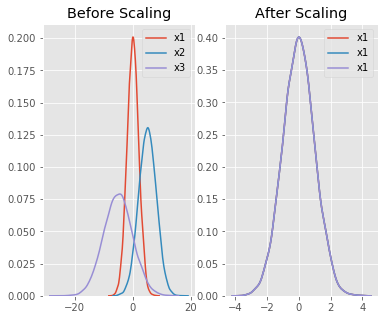

In [30]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'],ax=ax1)
sns.kdeplot(df['x2'],ax=ax1)
sns.kdeplot(df['x3'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(scaled_df['x1'],ax=ax2)
sns.kdeplot(scaled_df['x1'],ax=ax2)
sns.kdeplot(scaled_df['x1'],ax=ax2)

In [32]:
df = pd.DataFrame({
    'x1': np.random.chisquare(8,1000),
    'x2': np.random.beta(8,2,1000)*40,
    'x3': np.random.normal(50,3,1000)
})

In [33]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=['x1','x2','x3'])

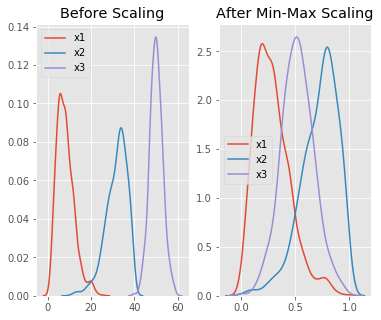

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [61]:
data = np.genfromtxt('metricdata.csv',delimiter=',',skip_header=1)
x_train,x_test,y_train,y_test = train_test_split(data[:,:2],data[:,2],test_size=0.1,random_state=42)

In [62]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
print(np.sum(predicted==y_test)/len(y_test))

0.5714285714285714


In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
print(np.sum(predicted==y_test)/len(y_test))

0.6666666666666666


In [91]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
print(np.sum(predicted==y_test)/len(y_test))

0.7142857142857143


In [64]:
def unscaledAccuracy(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    return np.sum(knn.predict(x_test)==y_test)/len(y_test)

In [65]:
m = np.arange(1,11)
p = [unscaledAccuracy(i) for i in m]

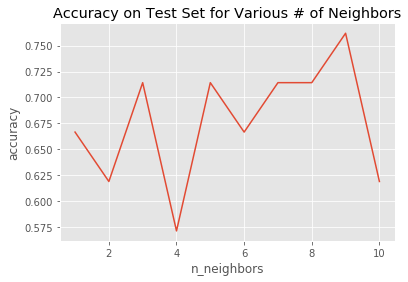

In [66]:
plt.plot(m,p)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('Accuracy on Test Set for Various # of Neighbors')
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1,11,1)
}

In [68]:
grid_search = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

C:\Users\Cory\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [69]:
grid_search.best_params_

{'n_neighbors': 3}

In [70]:
best = grid_search.best_estimator_
predicted = best.predict(x_test)
np.sum(predicted==y_test)/len(y_test)

0.7142857142857143

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledTrainData = scaler.fit_transform(x_train)
scaledTestData = scaler.fit_transform(x_test)

In [72]:
def minMaxScaledAccuracy(n,x_tr,y_tr,x_ts,y_ts):
    knn = KNeighborsClassifier(n)
    knn.fit(x_tr,y_tr)
    predicted = knn.predict(x_ts)
    return np.sum(predicted==y_ts)/len(y_ts)

In [76]:
minMaxScaledAccuracy(3,scaledTrainData,y_train,scaledTestData,y_test)

0.7619047619047619

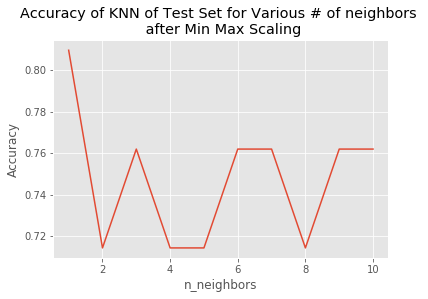

In [74]:
p2 = [minMaxScaledAccuracy(i,scaledTrainData,y_train,scaledTestData,y_test) for i in m]
plt.plot(m,p2)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN of Test Set for Various # of neighbors \n after Min Max Scaling')
plt.show()

In [79]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1,11,1)
}
grid_search = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')
grid_search.fit(scaledTrainData,y_train)

C:\Users\Cory\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [81]:
best2 = grid_search.best_estimator_
best2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [83]:
predicted = best2.predict(scaledTestData)
print(np.sum(predicted==y_test)/len(y_test))

0.7142857142857143


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
scaledTrainData = scaler.fit_transform(x_train)
scaledTestData = scaler.fit_transform(x_test)

In [86]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')
grid_search.fit(scaledTrainData,y_train)

C:\Users\Cory\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [87]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [90]:
best3 = grid_search.best_estimator_
predicted = best3.predict(x_test)
print(np.sum(predicted==y_test)/len(y_test))

0.6190476190476191
